# Part D(b): LQR Design for a Non-Linear System

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.linalg import solve_continuous_are
import matplotlib.pyplot as plt

In [2]:
# 1. Define system parameters
M = 1000  # Mass of the cart
m1 = 100  # Mass of Pendulum 1
m2 = 100  # Mass of Pendulum 2
l1 = 20   # Length of the string of Pendulum 1
l2 = 10   # Length of the string of Pendulum 2
g = 9.81  # Acceleration due to gravity (m/s^2)
# Define the LQR parameters
Q = np.diag([1000, 100, 1000, 1000, 100, 100])
R = np.array([[0.1]])

In [3]:

A = np.array([[0, 1, 0, 0, 0, 0],
              [0, 0, -(m1*g)/M, 0, -(m2*g)/M, 0],
              [0, 0, 0, 1, 0, 0],
              [0, 0, -((M+m1)*g)/(M*l1), 0, -(m2*g)/(M*l1), 0],
              [0, 0, 0, 0, 0, 1],
              [0, 0, -(m1*g)/(M*l2), 0, -(g*(M+m2))/(M*l2), 0]])
print("A = ")
A

A = 


array([[ 0.     ,  1.     ,  0.     ,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.981  ,  0.     , -0.981  ,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  1.     ,  0.     ,  0.     ],
       [ 0.     ,  0.     , -0.53955,  0.     , -0.04905,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  1.     ],
       [ 0.     ,  0.     , -0.0981 ,  0.     , -1.0791 ,  0.     ]])

In [4]:
B = np.array([[0], [1/M], [0], [1/(M*l1)], [0], [1/(M*l2)]])
print("B = ")
B

B = 


array([[0.e+00],
       [1.e-03],
       [0.e+00],
       [5.e-05],
       [0.e+00],
       [1.e-04]])

In [5]:
# Compute LQR gain matrix K
P = solve_continuous_are(A, B, Q, R)
print("P = ")
P

P = 


array([[   4882.91311849,   11871.42026134,   -5553.68647251,
         -18528.72264325,   -3270.95198186,   -9449.84129178],
       [  11871.42026134,   58866.66912716,   -8589.44588931,
        -101796.64331716,   -6521.93305037,  -49477.05776444],
       [  -5553.68647251,   -8589.44588931,  359821.06683642,
          14921.71671745,   -7970.72928199,    6267.44618594],
       [ -18528.72264325, -101796.64331716,   14921.71671745,
         836482.87294587,   11898.39558792,   44356.34944783],
       [  -3270.95198186,   -6521.93305037,   -7970.72928199,
          11898.39558792,  112410.07030794,    5299.56343381],
       [  -9449.84129178,  -49477.05776444,    6267.44618594,
          44356.34944783,    5299.56343381,  145497.20473458]])

In [6]:
K_val = np.dot(np.linalg.inv(R), np.dot(B.T, P))
print("K = ")
K_val

K = 


array([[ 100.        ,  488.29131185,  -72.16615435, -555.36864725,
         -53.97056928, -327.09519819]])

In [7]:
# Define the double_pendulum_dynamics function
def double_pendulum_dynamics(t, y):
    F = -np.dot(K_val, y)
    dydt = np.zeros(6)
    dydt[0] = y[1]
    dydt[1] = (F - (g/2) * (m1*np.sin(2*y[2]) + m2*np.sin(2*y[4])) - (m1*l1*y[3]**2*np.sin(y[2])) - (m2*l2*y[5]**2*np.sin(y[4]))) / (M + m1*np.sin(y[2])**2 + m2*np.sin(y[4])**2)
    dydt[2] = y[3]
    dydt[3] = (dydt[1]*np.cos(y[2]) - g*np.sin(y[2])) / l1
    dydt[4] = y[5]
    dydt[5] = (dydt[1]*np.cos(y[4]) - g*np.sin(y[4])) / l2
    return dydt

In [8]:
# Initial conditions
y0 = np.array([5, 0, np.radians(30), 0, np.radians(60), 0])
print("Initial conditions = ")
y0

Initial conditions = 


array([5.        , 0.        , 0.52359878, 0.        , 1.04719755,
       0.        ])

In [9]:
# Time span
tspan = (0, 5000)
t_eval = np.arange(0, 5000, 0.01)

# Solve the differential equations
sol = solve_ivp(double_pendulum_dynamics, tspan, y0, t_eval=t_eval)

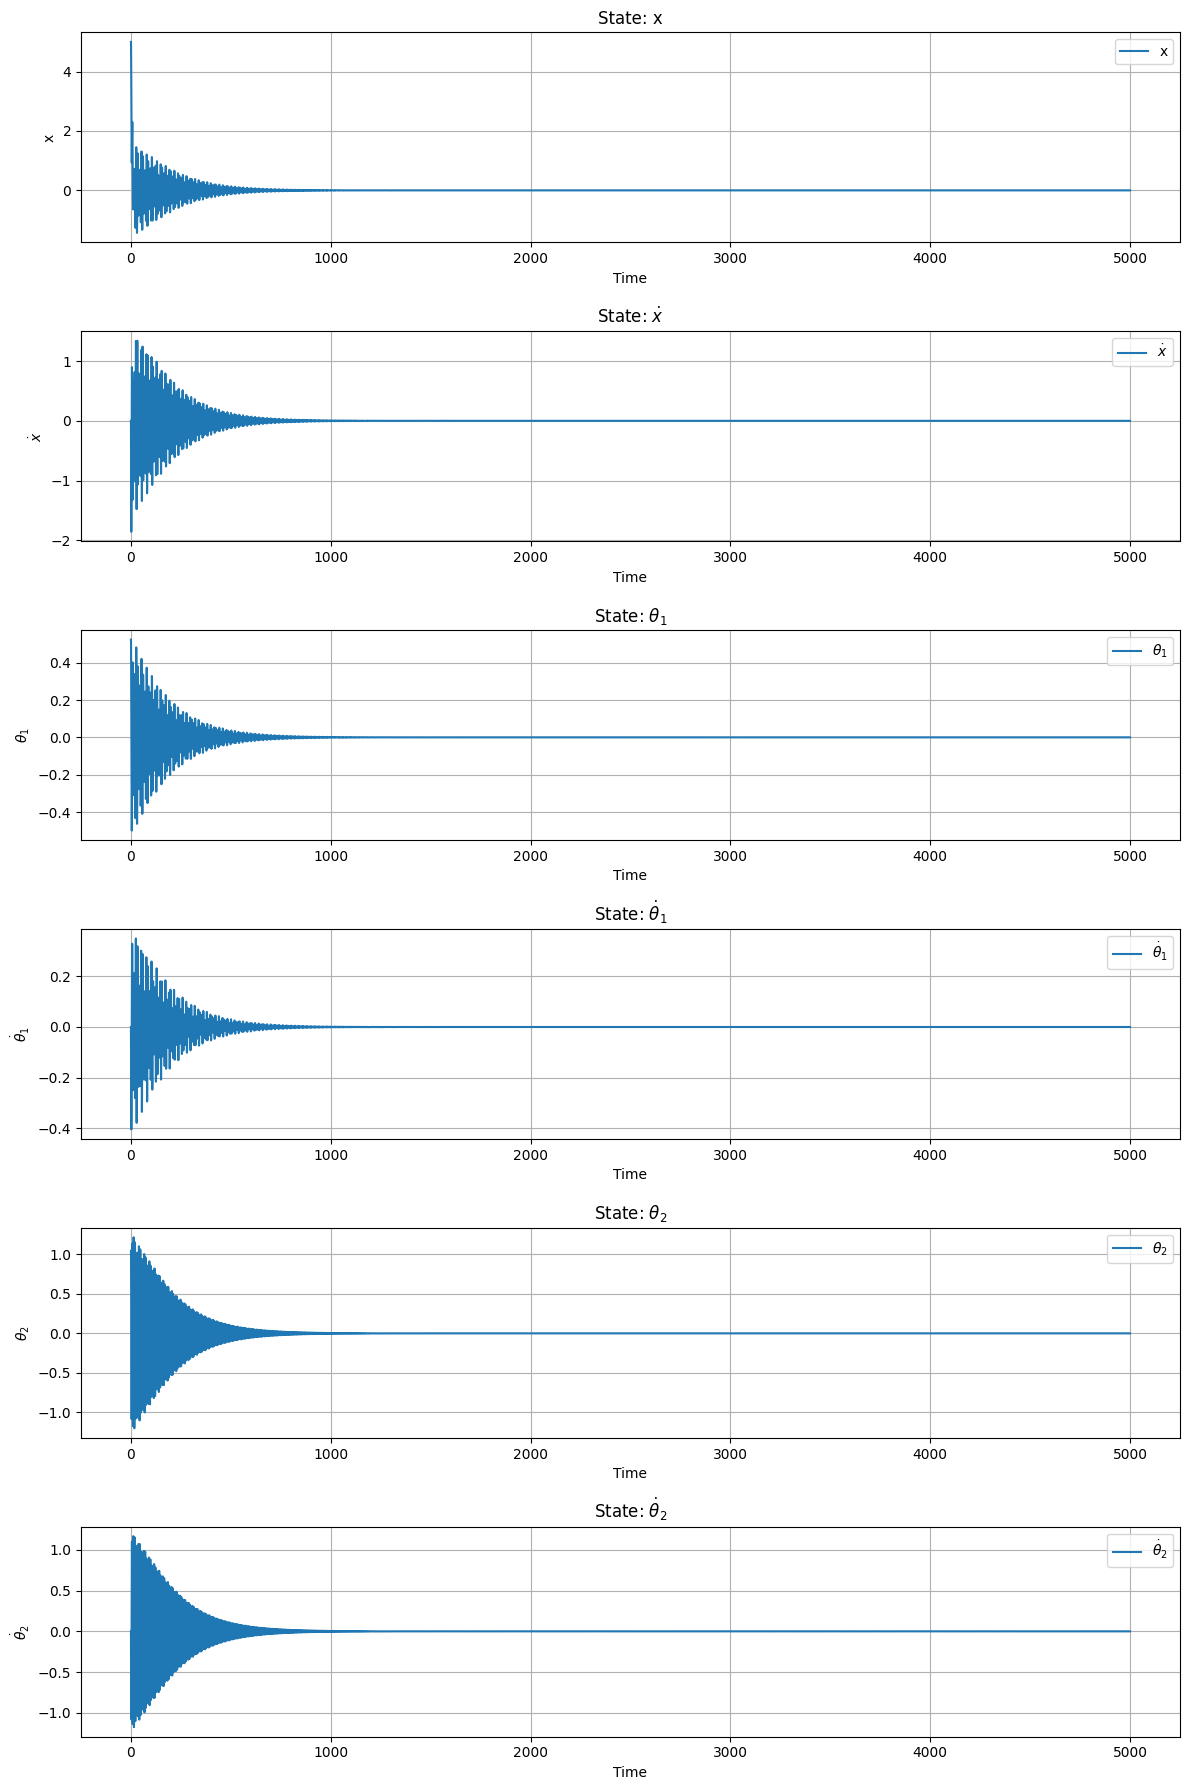

In [10]:
# Plotting each state variable in a separate subplot
plt.figure(figsize=(12, 18))
state_labels = ['x', '$\dot{x}$', '$\\theta_1$', '$\dot{\\theta}_1$', '$\\theta_2$', '$\dot{\\theta}_2$']

for i in range(sol.y.shape[0]):
    plt.subplot(len(state_labels), 1, i+1)
    plt.plot(sol.t, sol.y[i], label=state_labels[i])
    plt.title(f'State: {state_labels[i]}')
    plt.xlabel('Time')
    plt.ylabel(state_labels[i])
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

Overall, the response of each state variable indicates that the control system is effective in stabilizing the cart and pendulums from an initial disturbance. The plots show the expected behavior of a controlled dynamic system where the effects of an initial disturbance are mitigated over time, leading to a steady state. The time it takes for the oscillations to decay and the system to stabilize is indicative of the effectiveness of the LQR control strategy implemented.